In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-07-11 14:36:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   264MB/s    in 0.5s    

2022-07-11 14:36:07 (264 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-07-11 14:36:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  41.5MB/s    in 0.3s    

2022-07-11 14:36:08 (41.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os
import zipfile

In [4]:
zipfile.ZipFile('/tmp/horse-or-human.zip', 'r').extractall('/tmp/horse-or-human')

In [5]:
zipfile.ZipFile('/tmp/validation-horse-or-human.zip', 'r').extractall('/tmp/validation-horse-or-human')
zipfile.ZipFile('/tmp/validation-horse-or-human.zip', 'r').close()

In [6]:
import os

In [7]:
os.curdir

'.'

In [8]:
os.path.join('/tmp/horse-or-human/horses')

'/tmp/horse-or-human/horses'

In [9]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses') #slash dont forget
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [10]:
os.listdir(train_horse_dir)[:10]

['horse47-9.png',
 'horse22-4.png',
 'horse41-9.png',
 'horse33-7.png',
 'horse12-6.png',
 'horse20-4.png',
 'horse46-1.png',
 'horse32-5.png',
 'horse06-4.png',
 'horse38-6.png']

In [11]:
print(len(os.listdir(train_horse_dir)))
print(len(os.listdir(train_human_dir)))
print(len(os.listdir(validation_horse_dir)))
print(len(os.listdir(validation_human_dir)))

500
527
128
128


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [26]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(300, 300, 3)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen_tmp_var = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
train_generator = train_gen_tmp_var.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [18]:
validation_gen_tmp_var = ImageDataGenerator(rescale=1.0/255.0)

In [19]:
validation_generator = validation_gen_tmp_var.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [29]:
model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 1.0724 - accuracy: 0.5106 - val_loss: 0.6739 - val_accuracy: 0.5273
Epoch 2/20
8/8 [==============================] - 8s 957ms/step - loss: 0.6957 - accuracy: 0.6162 - val_loss: 0.5932 - val_accuracy: 0.6875
Epoch 3/20
8/8 [==============================] - 7s 915ms/step - loss: 0.5193 - accuracy: 0.7542 - val_loss: 0.7028 - val_accuracy: 0.8242
Epoch 4/20
8/8 [==============================] - 7s 892ms/step - loss: 0.3234 - accuracy: 0.8810 - val_loss: 1.8324 - val_accuracy: 0.7852
Epoch 5/20
8/8 [==============================] - 7s 1s/step - loss: 0.4787 - accuracy: 0.8554 - val_loss: 0.4575 - val_accuracy: 0.8438
Epoch 6/20
8/8 [==============================] - 7s 906ms/step - loss: 0.5174 - accuracy: 0.8554 - val_loss: 1.0243 - val_accuracy: 0.7578
Epoch 7/20
8/8 [==============================] - 7s 915ms/step - loss: 0.2604 - accuracy: 0.8977 - val_loss: 1.4484 - val_accuracy: 0.8008
Epoch 8/20
8/8 [==========

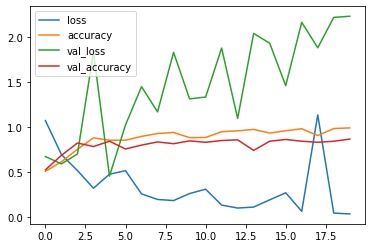

In [31]:
import pandas as pd
pd.DataFrame(model.history.history).plot()